# Process expert evaluation

In [8]:
import pandas as pd

In [9]:
index = "Ind"
title = "title"
article = "text"
ground_truth = "summary"

files = [
    f"{ground_truth}.txt", # Dummy for summary field
    "mbart_predictions.txt",
    "mt5_predictions.txt",
    "summarunner_predictions.txt",
    "llama_7b_predictions.csv",
    "starling_predictions.csv",
    "yagpt_predictions.csv",
    "yagpt3_predictions.csv"
]
summaries_fields = []
metrics = [
    "Актуальность",
    "Последовательность",
    "Беглость",
    "Согласованность",
    "Комментарий"
]

for file in files:
    model_name = file.split(".")[0]
    summaries_fields.append(model_name)
    for metric in metrics:
        summaries_fields.append(f"{model_name}_{metric}")

In [10]:
summaries_fields_types = {field : ('Int64' if field.split("_")[-1] != metrics[-1] and field + ".txt" not in files and field + ".csv" not in files else str) for field in summaries_fields}
print(summaries_fields_types)
summaries_fields_types[index] = 'Int64'
summaries_fields_types[article] = summaries_fields_types[ground_truth] = str

{'summary': <class 'str'>, 'summary_Актуальность': 'Int64', 'summary_Последовательность': 'Int64', 'summary_Беглость': 'Int64', 'summary_Согласованность': 'Int64', 'summary_Комментарий': <class 'str'>, 'mbart_predictions': <class 'str'>, 'mbart_predictions_Актуальность': 'Int64', 'mbart_predictions_Последовательность': 'Int64', 'mbart_predictions_Беглость': 'Int64', 'mbart_predictions_Согласованность': 'Int64', 'mbart_predictions_Комментарий': <class 'str'>, 'mt5_predictions': <class 'str'>, 'mt5_predictions_Актуальность': 'Int64', 'mt5_predictions_Последовательность': 'Int64', 'mt5_predictions_Беглость': 'Int64', 'mt5_predictions_Согласованность': 'Int64', 'mt5_predictions_Комментарий': <class 'str'>, 'summarunner_predictions': <class 'str'>, 'summarunner_predictions_Актуальность': 'Int64', 'summarunner_predictions_Последовательность': 'Int64', 'summarunner_predictions_Беглость': 'Int64', 'summarunner_predictions_Согласованность': 'Int64', 'summarunner_predictions_Комментарий': <class

In [11]:
# folder = "./human_annotations"
# annotations_files = [
#     "part1.csv",
#     "part2.csv",
#     "part3.csv",
#     "part4.csv",
#     "part5.csv"
# ]

# data_dict = {}
# for file in annotations_files:
#     data = pd.read_csv(f"{folder}/{file}", dtype=summaries_fields_types)
#     temp_data_dict = data.to_dict()
#     for key, value in temp_data_dict.items():
#         if key.split("_")[-1] in metrics:
#             for i in range(len(temp_data_dict[key])):
#                 temp_data_dict[key][i] = [temp_data_dict[key][i]] if temp_data_dict[key][i] is not None else []
#         if key not in data_dict:
#             data_dict[key] = list(value.values())
#             continue
#         elif key.split("_")[-1] in metrics[:-1]:
#             for i, val in enumerate(temp_data_dict[key].values()):
#                 try:
#                     data_dict[key][i] += val
#                 except:
#                     print(key, data_dict[key], "\n", temp_data_dict[key], val)
#                     raise
        

In [12]:
#print(data_dict.keys())

# Metrics

In [13]:
import pandas as pd
gazeta_metrics = pd.read_csv("gazeta_metrics.csv")
wikilingua_metrics = pd.read_csv("wikilingua_metrics.csv")

print(len(gazeta_metrics), len(wikilingua_metrics))

65 35


In [14]:
gazeta_metrics.head()

,Unnamed: 0.1,Ind,title,text,summary,mbart_predictions,mt5_predictions,summarunner_predictions,llama_7b_predictions,starling_predictions,...,yagpt3_predictions_rouge2,yagpt3_predictions_rougeL,yagpt3_predictions_rougeLsum,mbart_predictions_meteor,mt5_predictions_meteor,summarunner_predictions_meteor,llama_7b_predictions_meteor,starling_predictions_meteor,yagpt_predictions_meteor,yagpt3_predictions_meteor
0,53,53,Названа опасность постоянно включенного Blueto...,Постоянно включенный Bluetooth на смартфоне гр...,Активированный в смартфоне Bluetooth может пре...,Постоянно включенный Bluetooth на смартфоне гр...,"Эксперты предупреждают о том, что отключать Bl...",постоянно включенный bluetooth на смартфоне гр...,"Bluetooth постоянно включен, это опасно, так к...",Постоянно включенный Bluetooth может создавать...,...,0.011561,0.102857,0.114286,0.126459,0.053648,0.168245,0.207257,0.127202,0.168304,0.139373
1,244,244,Колесникова проходит подозреваемой по делу о з...,Член президиума координационного совета оппози...,Члена президиума оппозиционного Координационно...,Член президиума координационного совета оппози...,Член президиума координационного совета оппози...,член президиума координационного совета оппози...,"Мария Колесникова, член президиума координацио...","Мария Колесникова, член президиума координацио...",...,0.031250,0.164948,0.175258,0.248829,0.101734,0.263807,0.231588,0.310913,0.327753,0.224195
2,260,260,Deutsche Bank: в мире наступает эпоха беспорядка,Аналитики Deutsche Bank обнародовали исследова...,В истории человечества наступает эпоха беспоря...,В 2020 году в мире наступит новая эпоха беспор...,Пандемия коронавируса привела к появлениям нов...,аналитики deutsche bank обнародовали исследова...,Аналитики Deutsche Bank предсказали наступлени...,"Аналитики Deutsche Bank предполагают, что 2020...",...,0.078431,0.193548,0.245161,0.309631,0.086664,0.314012,0.262029,0.238650,0.295642,0.311487
3,355,355,«Ъ»: Минтранс подготовил проект поправок к ПДД,ГИБДД совместно с Минтрансом разработала масшт...,Масштабный проект изменений в ПДД подготовили ...,ГИБДД совместно с Минтрансом разработала масшт...,В Госдуму вступили в силу поправки в правила д...,гибдд совместно с минтрансом разработала масшт...,ГИБДД и Минтранс разработали проект изменений ...,ГИБДД и Минтранс разработали проект изменений ...,...,0.095238,0.224299,0.205607,0.306315,0.082645,0.233184,0.256739,0.270406,0.338463,0.296722
4,653,653,Tesla выпустит бюджетный беспилотник в 2023 году,Вечером 22 сентября на конференции Battery Day...,Миллиардер Илон Маск пообещал представить бюдж...,На конференции Battery Day глава Tesla Илон Ма...,Илон Маск рассчитывает вывести на рынок бюджет...,вечером 22 сентября на конференции battery day...,Илон Маск представил планы Tesla по выходу на ...,"В ходе конференции Tesla Battery Day, Илон Мас...",...,0.108434,0.190476,0.238095,0.098891,0.100573,0.146562,0.227205,0.193430,0.202198,0.251442


In [15]:
wikilingua_metrics.head()

,Ind,title,text,summary,mbart_predictions,mt5_predictions,summarunner_predictions,mbart_predictions_bleu,mt5_predictions_bleu,summarunner_predictions_bleu,...,yagpt3_predictions_rouge2,yagpt3_predictions_rougeL,yagpt3_predictions_rougeLsum,mbart_predictions_meteor,mt5_predictions_meteor,summarunner_predictions_meteor,llama_7b_predictions_meteor,starling_predictions_meteor,yagpt_predictions_meteor,yagpt3_predictions_meteor
0,156,wikilingua_multilingual-val-36988,Лучший путь поддержания здоровья зубов и предо...,Чистите зубы и используйте зубную нить. Не заб...,"Российские стоматологи рассказали о том, как з...",Существует множество способов защитить зубы от...,выберите синюю водолазку и темный блеск для гу...,0.017496,0.005383,0.060654,...,0.034682,0.182857,0.125714,0.047393,0.036145,0.181536,0.182509,0.115063,0.231934,0.204158
1,400,wikilingua_multilingual-val-37232,"Ваши руки - ваше сокровище, ухаживайте за ними...",Чрезмерный уход за руками. Не бросайте свою ос...,"На этой неделе мы расскажем о том, как правиль...","Если вы когда-нибудь станете топ моделью, то н...",регулярно мажьте руки питательным кремом. если...,0.016922,0.011950,0.075167,...,0.033898,0.150000,0.083333,0.037221,0.050000,0.183860,0.165975,0.170541,0.162835,0.169991
2,472,wikilingua_multilingual-val-37304,Или поместите ее в посудомоечную машину. Когда...,После еды сложите посуду в раковину и споласки...,"В сегодняшнем обзоре мы расскажем о том, как п...",Вы можете вывести пятна из стиральной машины.\n,"когда вы заметите, что она заполнена, запустит...",0.023233,0.002937,0.036801,...,0.020202,0.178218,0.217822,0.099200,0.013587,0.121951,0.192115,0.143198,0.194789,0.199416
3,500,wikilingua_multilingual-val-37332,"Все люди видят сны, и часто не по одному за но...",Ведите дневник сновидений. Делайте записи в дн...,"В преддверии ночи, когда вы проснетесь из-за с...",Сношения во сне могут помочь вам лучше понимат...,"записывайте все мельчайшие детали, а также фик...",0.066542,0.058565,0.039209,...,0.000000,0.074627,0.059701,0.103093,0.051546,0.225160,0.174309,0.226337,0.250197,0.104895
4,501,wikilingua_multilingual-val-37333,. Прежде всего вам необходимо начинать поиски ...,Найдите свое определение любви Учитывайте разн...,"В сегодняшнем материале мы поговорим о том, ка...","Любовь - это явление, которое можно описать ка...",в контексте романтической любви многие нередко...,0.051349,0.049504,0.029521,...,0.012987,0.115385,0.128205,0.106007,0.054945,0.182371,0.241204,0.163728,0.169492,0.171053


In [16]:
wikilingua_metrics = wikilingua_metrics[[column for column in wikilingua_metrics.columns if "Ind" not in column and "Unnamed" not in column]]
gazeta_metrics = gazeta_metrics[[column for column in gazeta_metrics.columns if "Ind" not in column and "Unnamed" not in column]]

print(len(gazeta_metrics), len(wikilingua_metrics))

65 35


In [17]:
wikilingua_metrics.head()

,title,text,summary,mbart_predictions,mt5_predictions,summarunner_predictions,mbart_predictions_bleu,mt5_predictions_bleu,summarunner_predictions_bleu,llama_7b_predictions,...,yagpt3_predictions_rouge2,yagpt3_predictions_rougeL,yagpt3_predictions_rougeLsum,mbart_predictions_meteor,mt5_predictions_meteor,summarunner_predictions_meteor,llama_7b_predictions_meteor,starling_predictions_meteor,yagpt_predictions_meteor,yagpt3_predictions_meteor
0,wikilingua_multilingual-val-36988,Лучший путь поддержания здоровья зубов и предо...,Чистите зубы и используйте зубную нить. Не заб...,"Российские стоматологи рассказали о том, как з...",Существует множество способов защитить зубы от...,выберите синюю водолазку и темный блеск для гу...,0.017496,0.005383,0.060654,"Чистите зубы каждый день, пользовайтесь зубной...",...,0.034682,0.182857,0.125714,0.047393,0.036145,0.181536,0.182509,0.115063,0.231934,0.204158
1,wikilingua_multilingual-val-37232,"Ваши руки - ваше сокровище, ухаживайте за ними...",Чрезмерный уход за руками. Не бросайте свою ос...,"На этой неделе мы расскажем о том, как правиль...","Если вы когда-нибудь станете топ моделью, то н...",регулярно мажьте руки питательным кремом. если...,0.016922,0.011950,0.075167,"Ваши руки - ваше сокровище, ухаживайте за ними...",...,0.033898,0.150000,0.083333,0.037221,0.050000,0.183860,0.165975,0.170541,0.162835,0.169991
2,wikilingua_multilingual-val-37304,Или поместите ее в посудомоечную машину. Когда...,После еды сложите посуду в раковину и споласки...,"В сегодняшнем обзоре мы расскажем о том, как п...",Вы можете вывести пятна из стиральной машины.\n,"когда вы заметите, что она заполнена, запустит...",0.023233,0.002937,0.036801,Используйте посудомоечную машину для стирки од...,...,0.020202,0.178218,0.217822,0.099200,0.013587,0.121951,0.192115,0.143198,0.194789,0.199416
3,wikilingua_multilingual-val-37332,"Все люди видят сны, и часто не по одному за но...",Ведите дневник сновидений. Делайте записи в дн...,"В преддверии ночи, когда вы проснетесь из-за с...",Сношения во сне могут помочь вам лучше понимат...,"записывайте все мельчайшие детали, а также фик...",0.066542,0.058565,0.039209,"Записывайте сны сразу после пробуждения, чтобы...",...,0.000000,0.074627,0.059701,0.103093,0.051546,0.225160,0.174309,0.226337,0.250197,0.104895
4,wikilingua_multilingual-val-37333,. Прежде всего вам необходимо начинать поиски ...,Найдите свое определение любви Учитывайте разн...,"В сегодняшнем материале мы поговорим о том, ка...","Любовь - это явление, которое можно описать ка...",в контексте романтической любви многие нередко...,0.051349,0.049504,0.029521,Любовь — это сильное расположение и привязанно...,...,0.012987,0.115385,0.128205,0.106007,0.054945,0.182371,0.241204,0.163728,0.169492,0.171053


In [18]:
gazeta_metrics.head()

,title,text,summary,mbart_predictions,mt5_predictions,summarunner_predictions,llama_7b_predictions,starling_predictions,yagpt_predictions,yagpt3_predictions,...,yagpt3_predictions_rouge2,yagpt3_predictions_rougeL,yagpt3_predictions_rougeLsum,mbart_predictions_meteor,mt5_predictions_meteor,summarunner_predictions_meteor,llama_7b_predictions_meteor,starling_predictions_meteor,yagpt_predictions_meteor,yagpt3_predictions_meteor
0,Названа опасность постоянно включенного Blueto...,Постоянно включенный Bluetooth на смартфоне гр...,Активированный в смартфоне Bluetooth может пре...,Постоянно включенный Bluetooth на смартфоне гр...,"Эксперты предупреждают о том, что отключать Bl...",постоянно включенный bluetooth на смартфоне гр...,"Bluetooth постоянно включен, это опасно, так к...",Постоянно включенный Bluetooth может создавать...,- Постоянно включенный Bluetooth на смартфоне ...,Доцент кафедры информатики РЭУ им. Плеханова А...,...,0.011561,0.102857,0.114286,0.126459,0.053648,0.168245,0.207257,0.127202,0.168304,0.139373
1,Колесникова проходит подозреваемой по делу о з...,Член президиума координационного совета оппози...,Члена президиума оппозиционного Координационно...,Член президиума координационного совета оппози...,Член президиума координационного совета оппози...,член президиума координационного совета оппози...,"Мария Колесникова, член президиума координацио...","Мария Колесникова, член президиума координацио...",- Член президиума координационного совета оппо...,"Мария Колесникова, член президиума координацио...",...,0.031250,0.164948,0.175258,0.248829,0.101734,0.263807,0.231588,0.310913,0.327753,0.224195
2,Deutsche Bank: в мире наступает эпоха беспорядка,Аналитики Deutsche Bank обнародовали исследова...,В истории человечества наступает эпоха беспоря...,В 2020 году в мире наступит новая эпоха беспор...,Пандемия коронавируса привела к появлениям нов...,аналитики deutsche bank обнародовали исследова...,Аналитики Deutsche Bank предсказали наступлени...,"Аналитики Deutsche Bank предполагают, что 2020...",- Аналитики Deutsche Bank предсказали наступле...,Аналитики Deutsche Bank предсказали наступлени...,...,0.078431,0.193548,0.245161,0.309631,0.086664,0.314012,0.262029,0.238650,0.295642,0.311487
3,«Ъ»: Минтранс подготовил проект поправок к ПДД,ГИБДД совместно с Минтрансом разработала масшт...,Масштабный проект изменений в ПДД подготовили ...,ГИБДД совместно с Минтрансом разработала масшт...,В Госдуму вступили в силу поправки в правила д...,гибдд совместно с минтрансом разработала масшт...,ГИБДД и Минтранс разработали проект изменений ...,ГИБДД и Минтранс разработали проект изменений ...,- ГИБДД и Минтранс разработали масштабный прое...,ГИБДД совместно с Минтрансом разработали масшт...,...,0.095238,0.224299,0.205607,0.306315,0.082645,0.233184,0.256739,0.270406,0.338463,0.296722
4,Tesla выпустит бюджетный беспилотник в 2023 году,Вечером 22 сентября на конференции Battery Day...,Миллиардер Илон Маск пообещал представить бюдж...,На конференции Battery Day глава Tesla Илон Ма...,Илон Маск рассчитывает вывести на рынок бюджет...,вечером 22 сентября на конференции battery day...,Илон Маск представил планы Tesla по выходу на ...,"В ходе конференции Tesla Battery Day, Илон Мас...",- Глава Tesla Илон Маск анонсировал вывод на р...,На конференции Battery Day Илон Маск объявил о...,...,0.108434,0.190476,0.238095,0.098891,0.100573,0.146562,0.227205,0.193430,0.202198,0.251442


In [19]:
metrics_data = pd.concat([gazeta_metrics, wikilingua_metrics])

In [20]:
print(len(metrics_data))

100


In [21]:
metrics_data.to_csv("metrics_data.csv", index=False)
metrics_data.to_csv("metrics_data_ind.csv", index="Ind")

# Human annotations

In [22]:
gazeta_expert = pd.read_csv("compiled_expert_data_gazeta.csv")
wikilingua_expert = pd.read_csv("compiled_expert_data_wikilingua.csv")

In [23]:
gazeta_expert = gazeta_expert[[column for column in gazeta_expert.columns if "Ind" not in column and "Комментарий" not in column]]
wikilingua_expert = wikilingua_expert[[column for column in wikilingua_expert.columns if "Ind" not in column and "Комментарий" not in column]]

In [24]:
print(len(gazeta_expert.columns), gazeta_expert.columns)
print(len(wikilingua_expert.columns), wikilingua_expert.columns)

41 Index(['text', 'summary', 'summary_Актуальность', 'summary_Последовательность',
       'summary_Беглость', 'summary_Согласованность', 'mbart_predictions',
       'mbart_predictions_Актуальность',
       'mbart_predictions_Последовательность', 'mbart_predictions_Беглость',
       'mbart_predictions_Согласованность', 'mt5_predictions',
       'mt5_predictions_Актуальность', 'mt5_predictions_Последовательность',
       'mt5_predictions_Беглость', 'mt5_predictions_Согласованность',
       'summarunner_predictions', 'summarunner_predictions_Актуальность',
       'summarunner_predictions_Последовательность',
       'summarunner_predictions_Беглость',
       'summarunner_predictions_Согласованность', 'llama_7b_predictions',
       'llama_7b_predictions_Актуальность',
       'llama_7b_predictions_Последовательность',
       'llama_7b_predictions_Беглость', 'llama_7b_predictions_Согласованность',
       'starling_predictions', 'starling_predictions_Актуальность',
       'starling_predictions

In [25]:
expert_data = pd.concat(
    [gazeta_expert, wikilingua_expert], ignore_index=True
)
print(len(expert_data))

100


In [26]:
# expert_data.to_csv("compiled_expert_data.csv", index=False)
# expert_data.to_csv("compiled_expert_data_ind.csv")

In [28]:
expert_data = pd.read_csv("compiled_expert_data.csv")

## Statistics

In [29]:
index = "Ind"
title = "title"
article = "text"
ground_truth = "summary"

files = [
    f"{ground_truth}.txt", # Dummy for summary field
    "mbart_predictions.txt",
    "mt5_predictions.txt",
    "summarunner_predictions.txt",
    "llama_7b_predictions.csv",
    "starling_predictions.csv",
    "yagpt_predictions.csv",
    "yagpt3_predictions.csv"
]
summaries_fields = []
metrics = [
    "Актуальность",
    "Последовательность",
    "Беглость",
    "Согласованность",
    "Комментарий"
]

for file in files:
    model_name = file.split(".")[0]
    summaries_fields.append(model_name)
    for metric in metrics:
        summaries_fields.append(f"{model_name}_{metric}")

In [30]:
summary_fields = [field for field in summaries_fields if field.split("_")[-1] != metrics[-1] and (field + ".txt") not in files and (field + ".csv") not in files]
print(summary_fields)

['summary_Актуальность', 'summary_Последовательность', 'summary_Беглость', 'summary_Согласованность', 'mbart_predictions_Актуальность', 'mbart_predictions_Последовательность', 'mbart_predictions_Беглость', 'mbart_predictions_Согласованность', 'mt5_predictions_Актуальность', 'mt5_predictions_Последовательность', 'mt5_predictions_Беглость', 'mt5_predictions_Согласованность', 'summarunner_predictions_Актуальность', 'summarunner_predictions_Последовательность', 'summarunner_predictions_Беглость', 'summarunner_predictions_Согласованность', 'llama_7b_predictions_Актуальность', 'llama_7b_predictions_Последовательность', 'llama_7b_predictions_Беглость', 'llama_7b_predictions_Согласованность', 'starling_predictions_Актуальность', 'starling_predictions_Последовательность', 'starling_predictions_Беглость', 'starling_predictions_Согласованность', 'yagpt_predictions_Актуальность', 'yagpt_predictions_Последовательность', 'yagpt_predictions_Беглость', 'yagpt_predictions_Согласованность', 'yagpt3_pred

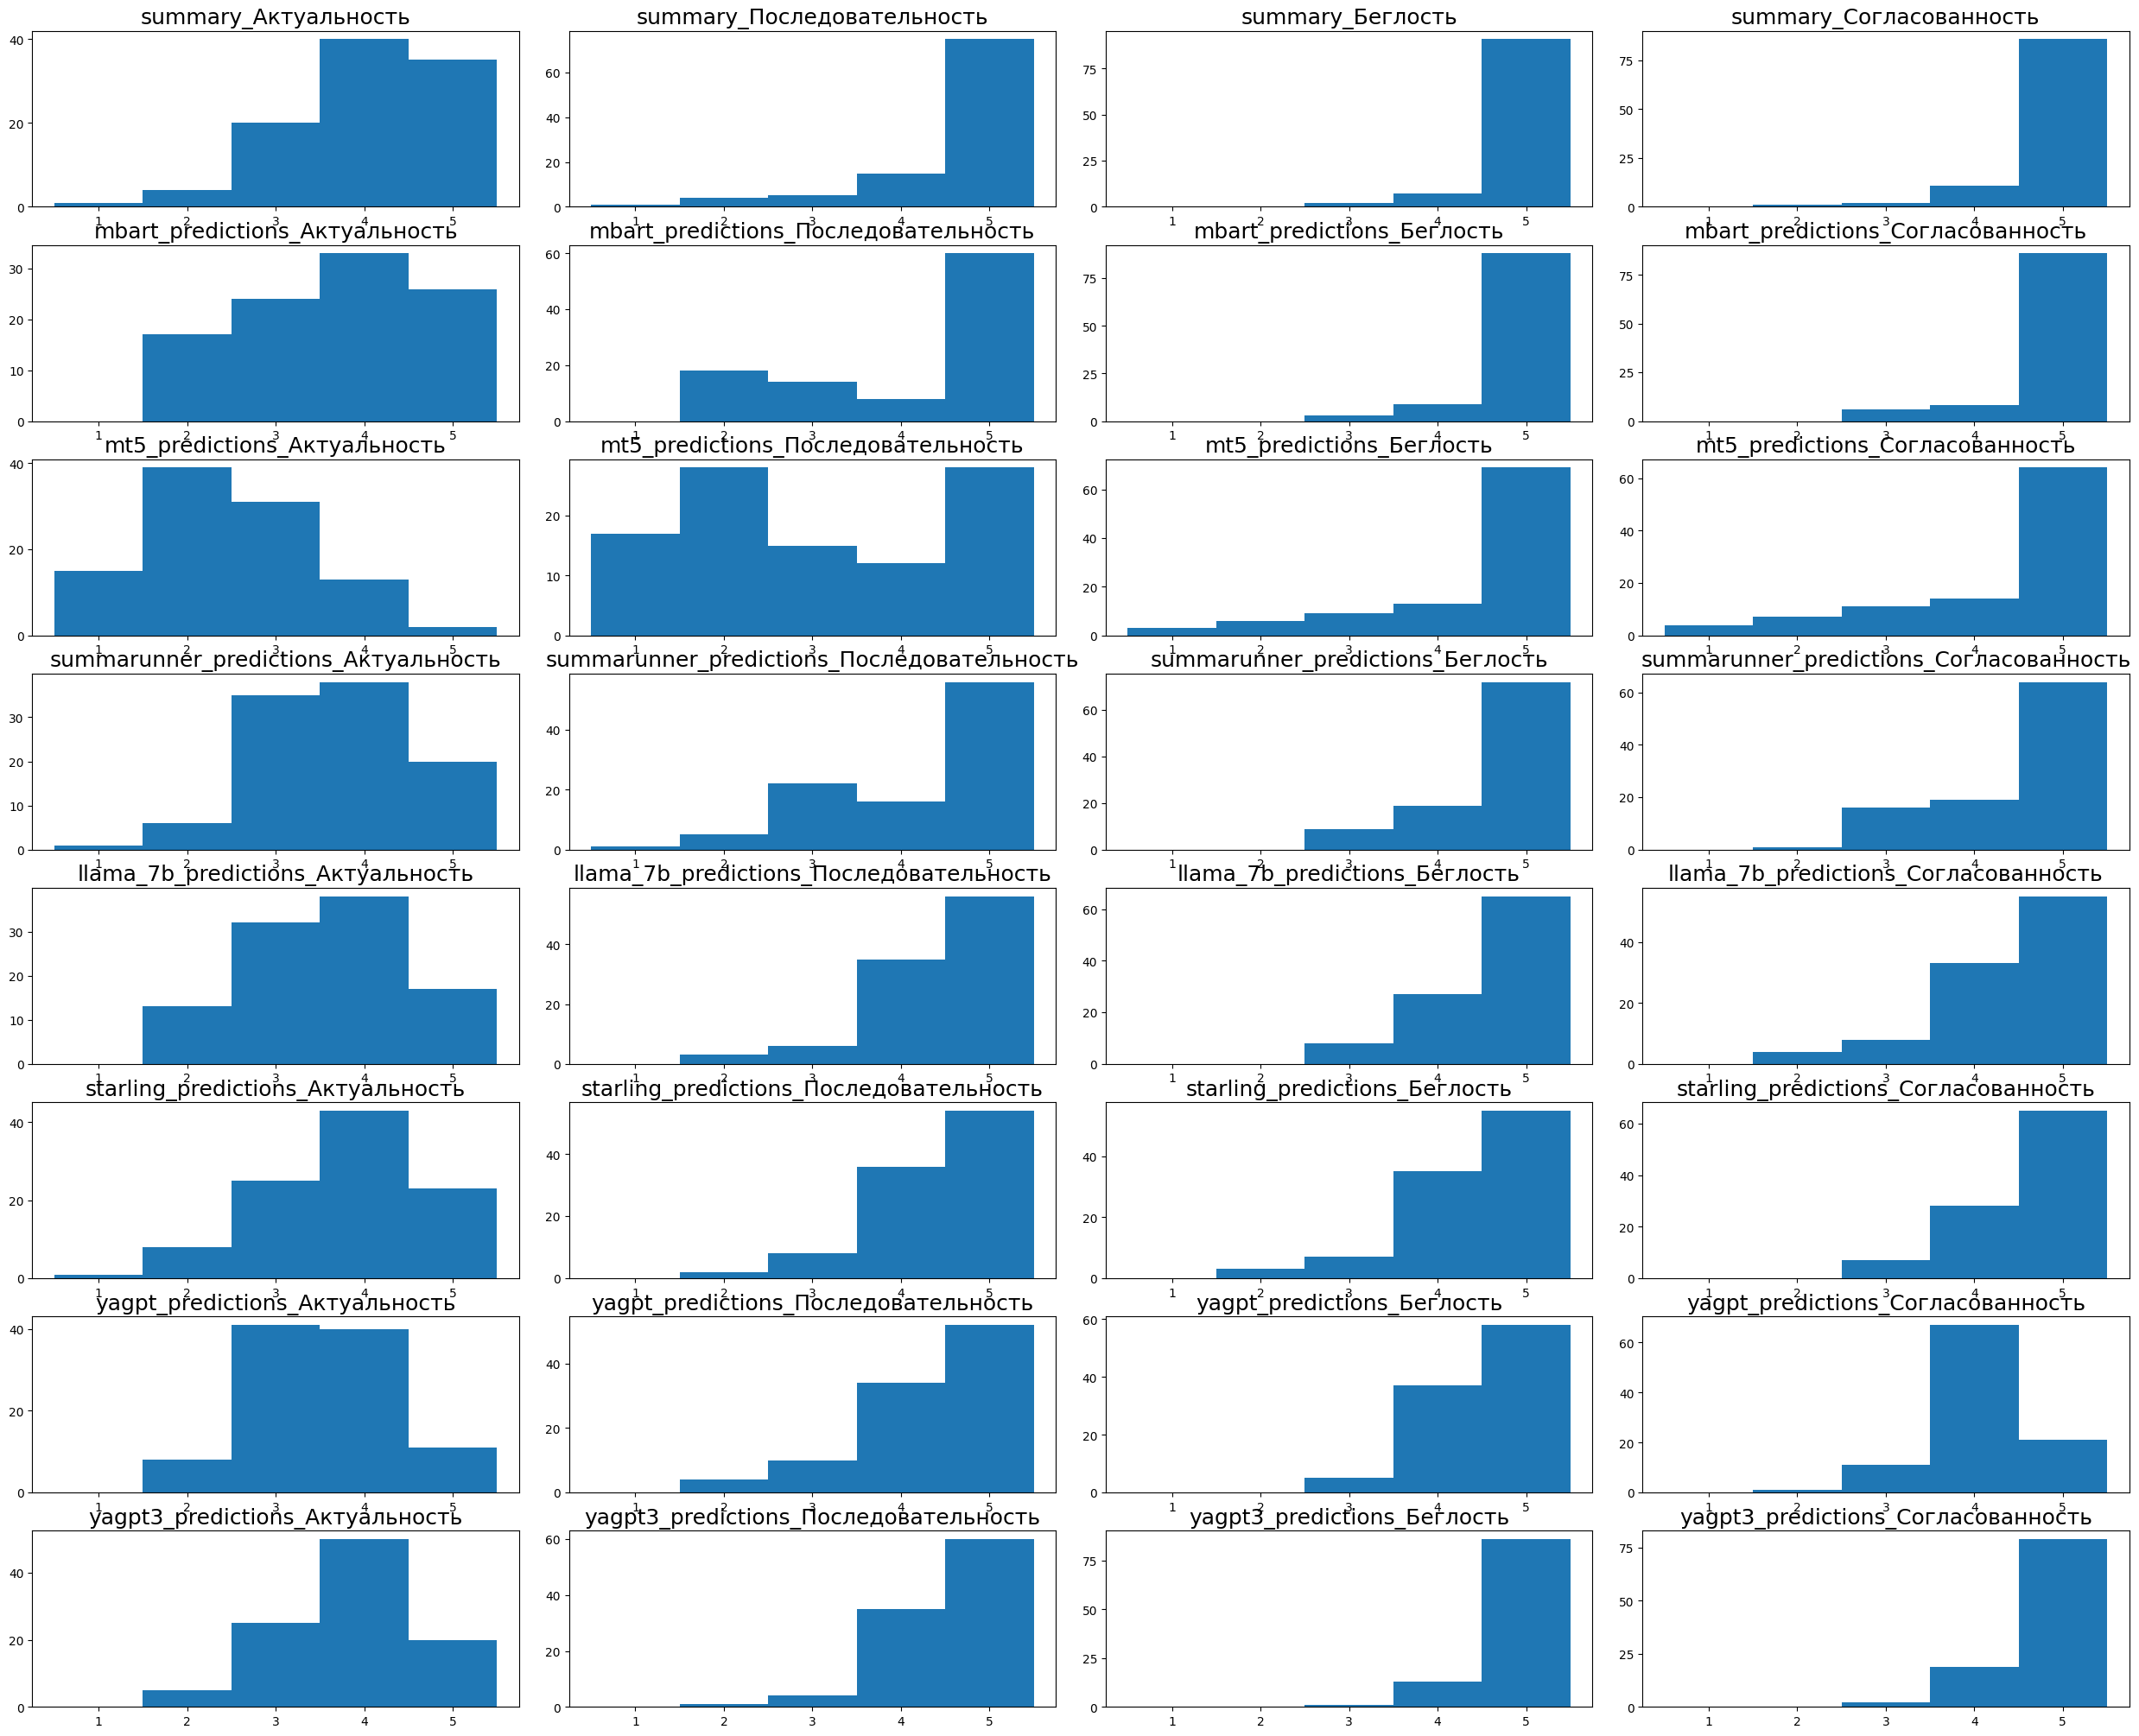

In [31]:
from matplotlib import pyplot as plt
import matplotlib

fig, axs = plt.subplots(len(files), len(metrics[:-1]))
fig.set_figheight(20)
fig.set_figwidth(25)
fig.tight_layout()
matplotlib.rcParams.update({'font.size': 15})

data_dict = expert_data.to_dict()

for i, field in enumerate(summary_fields):
    ind = (i // len(metrics[:-1]), i % len(metrics[:-1]))
    axs[*ind].set_title(field)
    axs[*ind].hist(data_dict[field].values(), bins=[b + 0.5 for b in range(0, 6)], )
    axs[*ind].locator_params(axis='x', integer=True)
plt.show()

## Text clusters

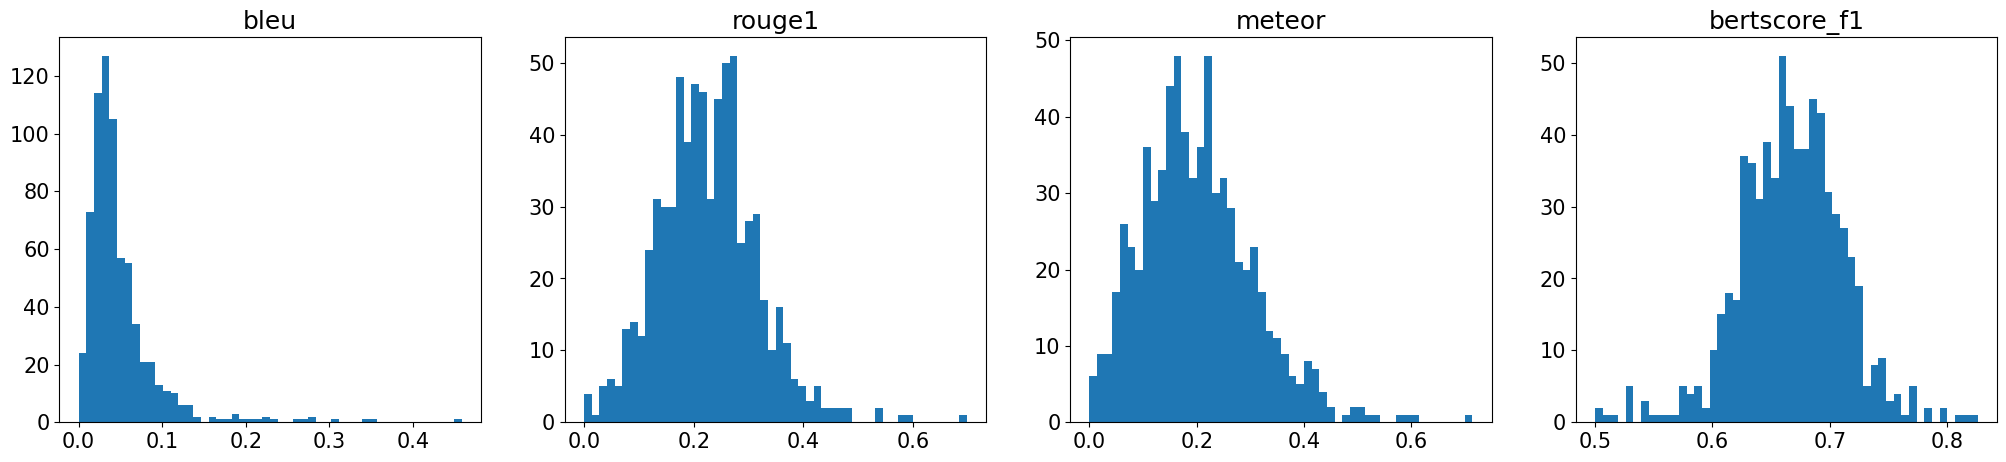

In [32]:
auto_data = []
human_data = []
cluster_metrics = [
    "bleu",
    "rouge1",
    "meteor",
    "bertscore_f1"
]
models = [file.split(".")[0] for file in files[1:]]
summary_dataset = pd.read_csv("metrics_data.csv")

fig, axs = plt.subplots(1, len(cluster_metrics))
fig.set_figheight(5)
fig.set_figwidth(25)
for i, metric in enumerate(cluster_metrics):
    values = []
    for model in models:
        auto_metric_field_name = f"{model}_{metric}"
        values += list(summary_dataset[auto_metric_field_name])
    axs[i].set_title(metric)
    axs[i].hist(values, bins=50)

plt.show()

## Correlation (Kendall, per-system)

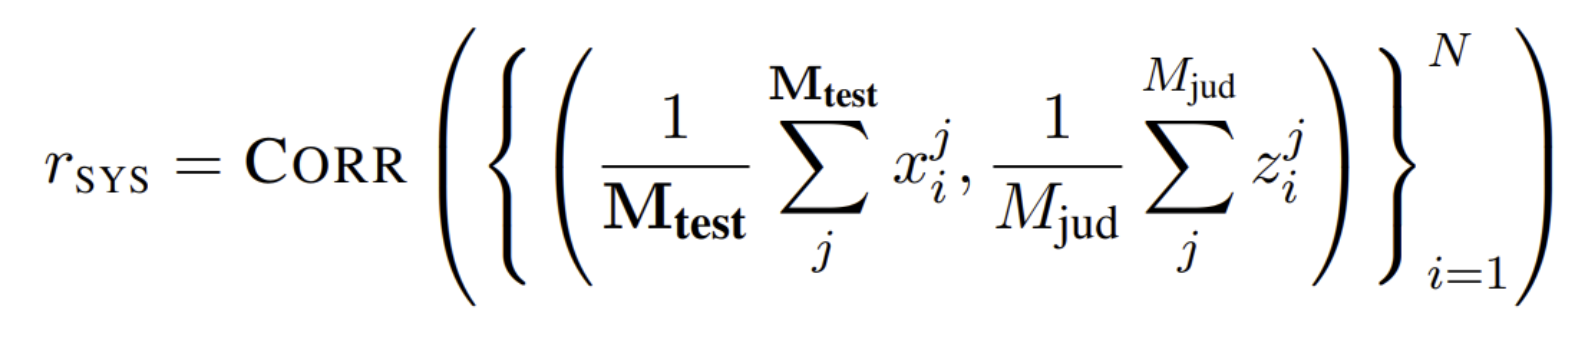

In [33]:
import scipy.stats as stats
import pandas as pd
import statistics

tau_metrics = metrics[:-1]
models = [file.split(".")[0] for file in files[1:]]
summary_dataset = pd.read_csv("metrics_data.csv")
summary_dataset.head()

,title,text,summary,mbart_predictions,mt5_predictions,summarunner_predictions,llama_7b_predictions,starling_predictions,yagpt_predictions,yagpt3_predictions,...,mbart_predictions_meteor,mt5_predictions_meteor,summarunner_predictions_meteor,llama_7b_predictions_meteor,starling_predictions_meteor,yagpt_predictions_meteor,yagpt3_predictions_meteor,mbart_predictions_bleu.1,mt5_predictions_bleu.1,summarunner_predictions_bleu.1
0,Названа опасность постоянно включенного Blueto...,Постоянно включенный Bluetooth на смартфоне гр...,Активированный в смартфоне Bluetooth может пре...,Постоянно включенный Bluetooth на смартфоне гр...,"Эксперты предупреждают о том, что отключать Bl...",постоянно включенный bluetooth на смартфоне гр...,"Bluetooth постоянно включен, это опасно, так к...",Постоянно включенный Bluetooth может создавать...,- Постоянно включенный Bluetooth на смартфоне ...,Доцент кафедры информатики РЭУ им. Плеханова А...,...,0.126459,0.053648,0.168245,0.207257,0.127202,0.168304,0.139373,NaN,NaN,NaN
1,Колесникова проходит подозреваемой по делу о з...,Член президиума координационного совета оппози...,Члена президиума оппозиционного Координационно...,Член президиума координационного совета оппози...,Член президиума координационного совета оппози...,член президиума координационного совета оппози...,"Мария Колесникова, член президиума координацио...","Мария Колесникова, член президиума координацио...",- Член президиума координационного совета оппо...,"Мария Колесникова, член президиума координацио...",...,0.248829,0.101734,0.263807,0.231588,0.310913,0.327753,0.224195,NaN,NaN,NaN
2,Deutsche Bank: в мире наступает эпоха беспорядка,Аналитики Deutsche Bank обнародовали исследова...,В истории человечества наступает эпоха беспоря...,В 2020 году в мире наступит новая эпоха беспор...,Пандемия коронавируса привела к появлениям нов...,аналитики deutsche bank обнародовали исследова...,Аналитики Deutsche Bank предсказали наступлени...,"Аналитики Deutsche Bank предполагают, что 2020...",- Аналитики Deutsche Bank предсказали наступле...,Аналитики Deutsche Bank предсказали наступлени...,...,0.309631,0.086664,0.314012,0.262029,0.238650,0.295642,0.311487,NaN,NaN,NaN
3,«Ъ»: Минтранс подготовил проект поправок к ПДД,ГИБДД совместно с Минтрансом разработала масшт...,Масштабный проект изменений в ПДД подготовили ...,ГИБДД совместно с Минтрансом разработала масшт...,В Госдуму вступили в силу поправки в правила д...,гибдд совместно с минтрансом разработала масшт...,ГИБДД и Минтранс разработали проект изменений ...,ГИБДД и Минтранс разработали проект изменений ...,- ГИБДД и Минтранс разработали масштабный прое...,ГИБДД совместно с Минтрансом разработали масшт...,...,0.306315,0.082645,0.233184,0.256739,0.270406,0.338463,0.296722,NaN,NaN,NaN
4,Tesla выпустит бюджетный беспилотник в 2023 году,Вечером 22 сентября на конференции Battery Day...,Миллиардер Илон Маск пообещал представить бюдж...,На конференции Battery Day глава Tesla Илон Ма...,Илон Маск рассчитывает вывести на рынок бюджет...,вечером 22 сентября на конференции battery day...,Илон Маск представил планы Tesla по выходу на ...,"В ходе конференции Tesla Battery Day, Илон Мас...",- Глава Tesla Илон Маск анонсировал вывод на р...,На конференции Battery Day Илон Маск объявил о...,...,0.098891,0.100573,0.146562,0.227205,0.193430,0.202198,0.251442,NaN,NaN,NaN


## BLEU

In [94]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_bleu"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    print(field)
    print(len(data_dict[field]))
    human_data.append(statistics.mean([sum([data_dict[field][i] for field in human_metrics_fields]) for i in range(100)]))

yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100


In [95]:
print(auto_data)
print(human_data)

[0.07454518996381095, 0.03482288482386278, 0.06296546604470492, 0.03924924421008021, 0.04943124822302839, 0.03759253697014962, 0.04725150438658131]
[17.43, 14.2, 17, 16.99, 17.21, 16.49, 18.01]


In [96]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [97]:
print(tau, p_value)

0.6190476190476191 0.06904761904761905


In [100]:
from correlation import corr
import numpy as np

# Example data
x = np.array(auto_data)
y = np.array(human_data)

# Calculate Kendall's tau and its confidence interval
tau, ci_lower, ci_upper, p = corr(x, y, method='kendall_tau')

print(f"Kendall's tau: {tau}")
print(f"Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"P-value: {p}")

Kendall's tau: 0.6190476190476191
Confidence Interval: (-0.02458134410853644, 0.8998642128954149)
P-value: 0.06904761904761905


### ROUGE1

In [101]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_rouge1"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    print(field)
    print(len(data_dict[field]))
    human_data.append(statistics.mean([sum([data_dict[field][i] for field in human_metrics_fields]) for i in range(100)]))

yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100
yagpt3_predictions_Согласованность
100


In [102]:
print(auto_data)
print(human_data)

[0.26220053453726644, 0.16275358449236588, 0.24640174494055075, 0.21965243007798937, 0.23872758799392704, 0.21414241905046316, 0.23960608632450503]
[17.43, 14.2, 17, 16.99, 17.21, 16.49, 18.01]


In [103]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [104]:
print(tau, p_value)

0.7142857142857143 0.03015873015873016


In [105]:
from correlation import corr
import numpy as np

# Example data
x = np.array(auto_data)
y = np.array(human_data)

# Calculate Kendall's tau and its confidence interval
tau, ci_lower, ci_upper, p = corr(x, y, method='kendall_tau')

print(f"Kendall's tau: {tau}")
print(f"Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"P-value: {p}")

Kendall's tau: 0.7142857142857143
Confidence Interval: (0.14676631425536035, 0.9280193408060681)
P-value: 0.03015873015873016


### METEOR

In [106]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_meteor"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([data_dict[field][i] for field in human_metrics_fields]) for i in range(100)]))

In [107]:
print(auto_data)
print(human_data)

[0.19748180196319223, 0.08869614677048965, 0.21484960266853187, 0.22612531305323683, 0.21528908173697095, 0.22122617528408564, 0.24663679055015958]
[17.43, 14.2, 17, 16.99, 17.21, 16.49, 18.01]


In [108]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [109]:
print(tau, p_value)

0.23809523809523814 0.5619047619047619


In [110]:
from correlation import corr
import numpy as np

# Example data
x = np.array(auto_data)
y = np.array(human_data)

# Calculate Kendall's tau and its confidence interval
tau, ci_lower, ci_upper, p = corr(x, y, method='kendall_tau')

print(f"Kendall's tau: {tau}")
print(f"Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"P-value: {p}")

Kendall's tau: 0.23809523809523814
Confidence Interval: (-0.4662687533397921, 0.7577031100905322)
P-value: 0.5619047619047619


### BERTScore

In [111]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_bertscore_f1"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([data_dict[field][i] for field in human_metrics_fields]) for i in range(100)]))

In [112]:
print(auto_data)
print(human_data)

[0.6696224373579025, 0.6392732173204422, 0.6607429033517838, 0.6753411090373993, 0.6702926516532898, 0.6756654751300811, 0.6804703199863433]
[17.43, 14.2, 17, 16.99, 17.21, 16.49, 18.01]


In [113]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [114]:
print(tau, p_value)

0.23809523809523814 0.5619047619047619


In [115]:
from correlation import corr
import numpy as np

# Example data
x = np.array(auto_data)
y = np.array(human_data)

# Calculate Kendall's tau and its confidence interval
tau, ci_lower, ci_upper, p = corr(x, y, method='kendall_tau')

print(f"Kendall's tau: {tau}")
print(f"Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"P-value: {p}")

Kendall's tau: 0.23809523809523814
Confidence Interval: (-0.4662687533397921, 0.7577031100905322)
P-value: 0.5619047619047619


## Correlation (per-system, M_judge)

### BLEU

In [50]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_bleu"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([data_dict[field][i] for field in human_metrics_fields]) for i in range(100)]))

In [51]:
print(auto_data)
print(human_data)

[0.07454518996381095, 0.03482288482386278, 0.06296546604470492, 0.03924924421008021, 0.04943124822302839, 0.03759253697014962, 0.04725150438658131]
[17.43, 14.2, 17, 16.99, 17.21, 16.49, 18.01]


In [52]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [53]:
print(tau, p_value)

0.6190476190476191 0.06904761904761905


In [54]:
from scipy.stats import bootstrap
import numpy as np
import math

def calc_kendalltau(x, y):
    tau = stats.kendalltau(x, y)[0]
    print(tau)
    return tau

rng = np.random.default_rng(seed=42)
data = (auto_data, human_data)
bootstrap_samples = bootstrap(data, calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)

0.6842105263157894
0.7999999999999999
0.9999999999999999
0.6190476190476191
0.6
0.4666666666666666
0.7333333333333333
0.4666666666666666
0.7333333333333333
0.4666666666666666
0.8666666666666666


/home/skatori/.local/lib/python3.12/site-packages/scipy/stats/_resampling.py:153: RuntimeWarning: invalid value encountered in scalar divide
  alpha_1 = ndtr(z0_hat + num1/(1 - a_hat*num1))
/home/skatori/.local/lib/python3.12/site-packages/scipy/stats/_resampling.py:155: RuntimeWarning: invalid value encountered in scalar divide
  alpha_2 = ndtr(z0_hat + num2/(1 - a_hat*num2))
/tmp/ipykernel_302241/2485683271.py:12: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bootstrap_samples = bootstrap(data, calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)


In [55]:
print(bootstrap_samples.confidence_interval)

ConfidenceInterval(low=nan, high=nan)


### ROUGE1

In [56]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_rouge1"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([data_dict[field][i] for field in human_metrics_fields]) for i in range(100)]))

In [57]:
print(auto_data)
print(human_data)

[0.26220053453726644, 0.16275358449236588, 0.24640174494055075, 0.21965243007798937, 0.23872758799392704, 0.21414241905046316, 0.23960608632450503]
[17.43, 14.2, 17, 16.99, 17.21, 16.49, 18.01]


In [58]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [59]:
print(tau, p_value)

0.7142857142857143 0.03015873015873016


In [60]:
from scipy.stats import bootstrap
import numpy as np
import math

def calc_kendalltau(x, y):
    tau = stats.kendalltau(x, y)[0]
    print(tau)
    return tau

rng = np.random.default_rng(seed=42)
data = (auto_data, human_data)
bootstrap_samples = bootstrap(data, calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)

0.7894736842105262
0.8999999999999999
0.9999999999999999
0.7142857142857143
0.7333333333333333
0.6
0.8666666666666666
0.6
0.7333333333333333
0.6
0.8666666666666666


/tmp/ipykernel_302241/2485683271.py:12: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bootstrap_samples = bootstrap(data, calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)


In [61]:
print(bootstrap_samples.confidence_interval)

ConfidenceInterval(low=nan, high=nan)


### METEOR

In [62]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_meteor"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([data_dict[field][i] for field in human_metrics_fields]) for i in range(100)]))

In [63]:
print(auto_data)
print(human_data)

[0.19748180196319223, 0.08869614677048965, 0.21484960266853187, 0.22612531305323683, 0.21528908173697095, 0.22122617528408564, 0.24663679055015958]
[17.43, 14.2, 17, 16.99, 17.21, 16.49, 18.01]


In [64]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [65]:
print(tau, p_value)

0.23809523809523814 0.5619047619047619


In [66]:
from scipy.stats import bootstrap
import numpy as np

def calc_kendalltau(x, y):
    tau = stats.kendalltau(x, y)[0]
    print(tau)
    if math.isnan(tau):
        tau = 0
    return tau

rng = np.random.default_rng(seed=42)
data = (auto_data, human_data)
bootstrap_samples = bootstrap(data, calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
print(bootstrap_samples.confidence_interval)

-0.15789473684210523
0.3
0.2
0.23809523809523814
0.4666666666666666
-0.06666666666666665
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
-0.06666666666666665
ConfidenceInterval(low=0.011572739735868892, high=0.29937622681189696)


### BERTScore

In [67]:
auto_data = []
human_data = []
for model in models:
    auto_metric_field_name = f"{model}_bertscore_f1"
    auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))

    human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
    human_data.append(statistics.mean([sum([data_dict[field][i] for field in human_metrics_fields]) for i in range(100)]))

In [68]:
print(auto_data)
print(human_data)

[0.6696224373579025, 0.6392732173204422, 0.6607429033517838, 0.6753411090373993, 0.6702926516532898, 0.6756654751300811, 0.6804703199863433]
[17.43, 14.2, 17, 16.99, 17.21, 16.49, 18.01]


In [69]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [70]:
print(tau, p_value)

0.23809523809523814 0.5619047619047619


In [71]:
from scipy.stats import bootstrap
import numpy as np

def calc_kendalltau(x, y):
    tau = stats.kendalltau(x, y)[0]
    if math.isnan(tau):
        tau = 0
    return tau

rng = np.random.default_rng(seed=42)
data = (auto_data, human_data)
bootstrap_samples = bootstrap(data, calc_kendalltau, n_resamples=1000, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
print(bootstrap_samples.confidence_interval)

ConfidenceInterval(low=-0.7777777777777779, high=0.7894736842105262)


## Correlation (per-input)

### BLEU

In [117]:
import math
res = []
ci_min = []
ci_max = []
for i in range(len(data_dict)):
    auto_data_temp = []
    human_data_temp = []
    for model in models:
        auto_metric_field_name = f"{model}_bleu"
        auto_data_temp.append(summary_dataset[auto_metric_field_name][i])
    
        human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
        human_data_temp.append(sum([data_dict[field][i] for field in human_metrics_fields]))

    
    bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
    ci = bootstrap_samples.confidence_interval
    if not math.isnan(ci.low):
        ci_min.append(ci.low)
    if not math.isnan(ci.high):
        ci_max.append(ci.high)
    # ci_min.append(ci.low)
    # ci_max.append(ci.high)
    
    tau_temp = stats.kendalltau(auto_data_temp, human_data_temp)[0]
    if math.isnan(tau_temp):
        tau_temp = 0
    res.append(tau_temp)
tau = statistics.mean(res)
ci = [statistics.mean(ci_min), statistics.mean(ci_max)]

/home/skatori/.local/lib/python3.12/site-packages/scipy/stats/_resampling.py:153: RuntimeWarning: invalid value encountered in scalar divide
  alpha_1 = ndtr(z0_hat + num1/(1 - a_hat*num1))
/home/skatori/.local/lib/python3.12/site-packages/scipy/stats/_resampling.py:155: RuntimeWarning: invalid value encountered in scalar divide
  alpha_2 = ndtr(z0_hat + num2/(1 - a_hat*num2))
/tmp/ipykernel_302241/528596638.py:16: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)


In [118]:
print(tau)
print(ci)

0.2358723861475769
[-0.16317762109356285, 0.5010884948189885]


In [119]:
from correlation import corr
import numpy as np

# Example data
x = np.array(auto_data_temp)
y = np.array(human_data_temp)

# Calculate Kendall's tau and its confidence interval
tau, ci_lower, ci_upper, p = corr(x, y, method='kendall_tau')

print(f"Kendall's tau: {tau}")
print(f"Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"P-value: {p}")

Kendall's tau: 0.33333333333333337
Confidence Interval: (-0.38120792694603783, 0.7985579537002357)
P-value: 0.3813492063492063


### ROUGE1

In [123]:
import math
res = []
ci_min = []
ci_max = []
for i in range(len(data_dict)):
    auto_data_temp = []
    human_data_temp = []
    for model in models:
        auto_metric_field_name = f"{model}_rouge1"
        auto_data_temp.append(summary_dataset[auto_metric_field_name][i])
    
        human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
        human_data_temp.append(sum([data_dict[field][i] for field in human_metrics_fields]))

    
    bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
    ci = bootstrap_samples.confidence_interval
    if not math.isnan(ci.low):
        ci_min.append(ci.low)
    if not math.isnan(ci.high):
        ci_max.append(ci.high)
    # ci_min.append(ci.low)
    # ci_max.append(ci.high)
    
    tau_temp = stats.kendalltau(auto_data_temp, human_data_temp)[0]
    if math.isnan(tau_temp):
        tau_temp = 0
    res.append(tau_temp)
tau = statistics.mean(res)
ci = [statistics.mean(ci_min), statistics.mean(ci_max)]

/tmp/ipykernel_302241/1945987427.py:16: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)


In [124]:
print(tau)
print(ci)

0.24435172937667124
[-0.009952020885150447, 0.5372684435130398]


In [125]:
from correlation import corr
import numpy as np

# Example data
x = np.array(auto_data_temp)
y = np.array(human_data_temp)

# Calculate Kendall's tau and its confidence interval
tau, ci_lower, ci_upper, p = corr(x, y, method='kendall_tau')

print(f"Kendall's tau: {tau}")
print(f"Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"P-value: {p}")

Kendall's tau: 0.23809523809523814
Confidence Interval: (-0.4662687533397921, 0.7577031100905322)
P-value: 0.5619047619047619


### METEOR

In [128]:
import math
res = []
ci_min = []
ci_max = []
for i in range(len(data_dict)):
    auto_data_temp = []
    human_data_temp = []
    for model in models:
        auto_metric_field_name = f"{model}_meteor"
        auto_data_temp.append(summary_dataset[auto_metric_field_name][i])
    
        human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
        human_data_temp.append(sum([data_dict[field][i] for field in human_metrics_fields]))

    bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
    ci = bootstrap_samples.confidence_interval
    if not math.isnan(ci.low):
        ci_min.append(ci.low)
    if not math.isnan(ci.high):
        ci_max.append(ci.high)
        
    tau_temp = stats.kendalltau(auto_data_temp, human_data_temp)[0]
    if math.isnan(tau_temp):
        tau_temp = 0
    res.append(tau_temp)
tau = statistics.mean(res)
ci = [statistics.mean(ci_min), statistics.mean(ci_max)]

/tmp/ipykernel_302241/2845691270.py:15: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)


In [129]:
print(tau)
print(ci)

0.23174082764081794
[-0.10871192965454869, 0.5014152225295144]


In [130]:
from correlation import corr
import numpy as np

# Example data
x = np.array(auto_data_temp)
y = np.array(human_data_temp)

# Calculate Kendall's tau and its confidence interval
tau, ci_lower, ci_upper, p = corr(x, y, method='kendall_tau')

print(f"Kendall's tau: {tau}")
print(f"Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"P-value: {p}")

Kendall's tau: 0.6190476190476191
Confidence Interval: (-0.02458134410853644, 0.8998642128954149)
P-value: 0.06904761904761905


### BERTScore

In [132]:
import math
res = []
ci_min = []
ci_max = []
for i in range(len(data_dict)):
    auto_data_temp = []
    human_data_temp = []
    for model in models:
        auto_metric_field_name = f"{model}_bertscore_f1"
        auto_data_temp.append(summary_dataset[auto_metric_field_name][i])
    
        human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]
        human_data_temp.append(sum([data_dict[field][i] for field in human_metrics_fields]))

    bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)
    ci = bootstrap_samples.confidence_interval
    if not math.isnan(ci.low):
        ci_min.append(ci.low)
    if not math.isnan(ci.high):
        ci_max.append(ci.high)
        
    tau_temp = stats.kendalltau(auto_data_temp, human_data_temp)[0]
    if math.isnan(tau_temp):
        tau_temp = 0
    res.append(tau_temp)
tau = statistics.mean(res)
ci = [statistics.mean(ci_min), statistics.mean(ci_max)]

/tmp/ipykernel_302241/2694832597.py:15: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bootstrap_samples = bootstrap((auto_data_temp, human_data_temp), calc_kendalltau, n_resamples=3, confidence_level=0.9, random_state=rng, paired=True, vectorized=False)


In [133]:
print(tau)
print(ci)

0.23137108580731913
[-0.02518307012777185, 0.46926167631533094]


In [134]:
from correlation import corr
import numpy as np

# Example data
x = np.array(auto_data_temp)
y = np.array(human_data_temp)

# Calculate Kendall's tau and its confidence interval
tau, ci_lower, ci_upper, p = corr(x, y, method='kendall_tau')

print(f"Kendall's tau: {tau}")
print(f"Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"P-value: {p}")

Kendall's tau: 0.23809523809523814
Confidence Interval: (-0.4662687533397921, 0.7577031100905322)
P-value: 0.5619047619047619


## Sys correlation for concrete metrics

In [135]:
import scipy.stats as stats

auto_metrics = ["bleu", "rouge1", "meteor", "bertscore_f1"]
human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]

human_metric_stats = {field_name: {metric: None for metric in auto_metrics} for field_name in tau_metrics}

print(human_metrics_fields)


for chosen_field in tau_metrics:
    for chosen_metric in auto_metrics:
        auto_data = []
        human_data = []
        for model in models:
            auto_metric_field_name = f"{model}_{chosen_metric}"
            auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))
        
            human_metrics_fields = f"{model}_{chosen_field}"
            human_data.append(statistics.mean([data_dict[human_metrics_fields][i] for i in range(100)]))
        # print(auto_data)
        # print(human_data)
        tau, p_value = stats.kendalltau(auto_data, human_data)
        human_metric_stats[chosen_field][chosen_metric] = (tau, p_value)

['yagpt3_predictions_Актуальность', 'yagpt3_predictions_Последовательность', 'yagpt3_predictions_Беглость', 'yagpt3_predictions_Согласованность']


In [136]:
pd.DataFrame(human_metric_stats)

,Актуальность,Последовательность,Беглость,Согласованность
bleu,"(0.4285714285714286, 0.2388888888888889)","(-0.04761904761904762, 1.0)","(0.5855400437691199, 0.06831386315089874)","(0.6190476190476191, 0.06904761904761905)"
rouge1,"(0.5238095238095238, 0.1361111111111111)","(0.04761904761904762, 1.0)","(0.6831300510639733, 0.03344063866399787)","(0.7142857142857143, 0.03015873015873016)"
meteor,"(0.4285714285714286, 0.2388888888888889)","(0.9047619047619049, 0.002777777777777778)","(0.29277002188455997, 0.3620501922003584)","(0.04761904761904762, 1.0)"
bertscore_f1,"(0.23809523809523814, 0.5619047619047619)","(0.7142857142857143, 0.03015873015873016)","(0.29277002188455997, 0.3620501922003584)","(0.04761904761904762, 1.0)"


In [150]:
import scipy.stats as stats

auto_metrics = ["bleu", "rouge1", "meteor", "bertscore_f1"]
human_metrics_fields = [f"{model}_{metric}" for metric in tau_metrics]

human_metric_stats = {field_name: {metric: None for metric in auto_metrics} for field_name in tau_metrics}

print(human_metrics_fields)


for chosen_field in tau_metrics:
    for chosen_metric in auto_metrics:
        auto_data = []
        human_data = []
        for model in models:
            auto_metric_field_name = f"{model}_{chosen_metric}"
            auto_data.append(statistics.mean(list(summary_dataset[auto_metric_field_name])))
        
            human_metrics_fields = f"{model}_{chosen_field}"
            human_data.append(statistics.mean([data_dict[human_metrics_fields][i] for i in range(100)]))
        # print(auto_data)
        # print(human_data)
        tau, ci_lower, ci_upper, p_value = corr(auto_data, human_data, method='kendall_tau')
        human_metric_stats[chosen_field][chosen_metric] = (tau, ci_lower, ci_upper, p_value)

['yagpt3_predictions_Актуальность', 'yagpt3_predictions_Последовательность', 'yagpt3_predictions_Беглость', 'yagpt3_predictions_Согласованность']


In [151]:
df = pd.DataFrame(human_metric_stats)

In [152]:
print("Метрика & ", " & ".join(df.columns), " \\tabularnewline")
print("\\hline")
for index, row in df.iterrows():
    print(index, " & ", " & ".join([f"{round(row[column][0], 2)} (CI [{round(row[column][1], 2)};{round(row[column][2], 2)}])" for column in df.columns]), " \\tabularnewline")
    print("\\hline")

Метрика &  Актуальность & Последовательность & Беглость & Согласованность  \tabularnewline
\hline
bleu  &  0.43 (CI [-0.28;0.84]) & -0.05 (CI [-0.66;0.6]) & 0.59 (CI [-0.08;0.89]) & 0.62 (CI [-0.02;0.9])  \tabularnewline
\hline
rouge1  &  0.52 (CI [-0.16;0.87]) & 0.05 (CI [-0.6;0.66]) & 0.68 (CI [0.09;0.92]) & 0.71 (CI [0.15;0.93])  \tabularnewline
\hline
meteor  &  0.43 (CI [-0.28;0.84]) & 0.9 (CI [0.56;1.0]) & 0.29 (CI [-0.42;0.78]) & 0.05 (CI [-0.6;0.66])  \tabularnewline
\hline
bertscore_f1  &  0.24 (CI [-0.47;0.76]) & 0.71 (CI [0.15;0.93]) & 0.29 (CI [-0.42;0.78]) & 0.05 (CI [-0.6;0.66])  \tabularnewline
\hline


In [82]:
tau, p_value = stats.kendalltau(auto_data, human_data)

In [83]:
print(tau, p_value)

0.04761904761904762 1.0


## Export

In [84]:
print(data_dict.keys())
print(data_dict["yagpt_predictions"][:2])

dict_keys(['text', 'summary', 'summary_Актуальность', 'summary_Последовательность', 'summary_Беглость', 'summary_Согласованность', 'mbart_predictions', 'mbart_predictions_Актуальность', 'mbart_predictions_Последовательность', 'mbart_predictions_Беглость', 'mbart_predictions_Согласованность', 'mt5_predictions', 'mt5_predictions_Актуальность', 'mt5_predictions_Последовательность', 'mt5_predictions_Беглость', 'mt5_predictions_Согласованность', 'summarunner_predictions', 'summarunner_predictions_Актуальность', 'summarunner_predictions_Последовательность', 'summarunner_predictions_Беглость', 'summarunner_predictions_Согласованность', 'llama_7b_predictions', 'llama_7b_predictions_Актуальность', 'llama_7b_predictions_Последовательность', 'llama_7b_predictions_Беглость', 'llama_7b_predictions_Согласованность', 'starling_predictions', 'starling_predictions_Актуальность', 'starling_predictions_Последовательность', 'starling_predictions_Беглость', 'starling_predictions_Согласованность', 'yagpt_pr

KeyError: slice(None, 2, None)

In [85]:
print(summary_dataset.columns)

Index(['title', 'text', 'summary', 'mbart_predictions', 'mt5_predictions',
       'summarunner_predictions', 'llama_7b_predictions',
       'starling_predictions', 'yagpt_predictions', 'yagpt3_predictions',
       'mbart_predictions_bertscore_precision',
       'mbart_predictions_bertscore_recall', 'mbart_predictions_bertscore_f1',
       'mt5_predictions_bertscore_precision',
       'mt5_predictions_bertscore_recall', 'mt5_predictions_bertscore_f1',
       'summarunner_predictions_bertscore_precision',
       'summarunner_predictions_bertscore_recall',
       'summarunner_predictions_bertscore_f1',
       'llama_7b_predictions_bertscore_precision',
       'llama_7b_predictions_bertscore_recall',
       'llama_7b_predictions_bertscore_f1',
       'starling_predictions_bertscore_precision',
       'starling_predictions_bertscore_recall',
       'starling_predictions_bertscore_f1',
       'yagpt_predictions_bertscore_precision',
       'yagpt_predictions_bertscore_recall', 'yagpt_predict

In [86]:
keys = data_dict.keys()
for key in keys:
    if "Комментарий" in key:
        continue
    if (isinstance(data_dict[key][0], list)):
        for i in range(len(data_dict[key])):
            data_dict[key][i] = np.mean(data_dict[key][i]) if data_dict[key][i] else None

In [87]:
print(data_dict["yagpt_predictions"][:2])

KeyError: slice(None, 2, None)

In [48]:
predictions = [
    "mbart_predictions",
    "mt5_predictions",
    "summarunner_predictions",
    "llama_7b_predictions",
    "starling_predictions",
    "yagpt_predictions",
    "yagpt3_predictions"
]

export_data = pd.DataFrame(data_dict)
print(summary_dataset.columns)
#summary_dataset = summary_dataset.rename(columns={'Unnamed: 0.1': 'Ind'})

#full_export_data = export_data[export_data["Ind"].isin(list(summary_dataset["Ind"]))]
full_export_data = export_data
print(len(full_export_data), len(summary_dataset))
full_export_data = pd.concat([full_export_data.set_index("Ind"), summary_dataset.set_index("Ind")], axis=1).reset_index()
#full_export_data = pd.concat([full_export_data.drop(predictions, axis=1), summary_dataset.set_index(full_export_data.index)], axis=1)
#full_export_data = full_export_data.loc[:,~full_export_data.columns.duplicated()].copy()
# print(full_export_data[full_export_data.columns.duplicated()])
#full_export_data = full_export_data[full_export_data["yagpt_predictions"] != "К сожалению, я не могу ничего сказать об этом. Давайте сменим тему?"]
full_export_data.head()

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'Ind',
       'title', 'text', 'summary', 'mbart_predictions', 'mt5_predictions',
       'summarunner_predictions', 'llama_7b_predictions',
       'starling_predictions', 'yagpt_predictions', 'yagpt3_predictions',
       'mbart_predictions_bertscore_precision',
       'mbart_predictions_bertscore_recall', 'mbart_predictions_bertscore_f1',
       'mt5_predictions_bertscore_precision',
       'mt5_predictions_bertscore_recall', 'mt5_predictions_bertscore_f1',
       'summarunner_predictions_bertscore_precision',
       'summarunner_predictions_bertscore_recall',
       'summarunner_predictions_bertscore_f1',
       'llama_7b_predictions_bertscore_precision',
       'llama_7b_predictions_bertscore_recall',
       'llama_7b_predictions_bertscore_f1',
       'starling_predictions_bertscore_precision',
       'starling_predictions_bertscore_recall',
       'starling_predictions_bertscore_f1',
       'yagpt_predictions_berts

,Ind,text,summary,summary_Актуальность,summary_Последовательность,summary_Беглость,summary_Согласованность,summary_Комментарий,mbart_predictions,mbart_predictions_Актуальность,...,yagpt3_predictions_rouge2,yagpt3_predictions_rougeL,yagpt3_predictions_rougeLsum,mbart_predictions_meteor,mt5_predictions_meteor,summarunner_predictions_meteor,llama_7b_predictions_meteor,starling_predictions_meteor,yagpt_predictions_meteor,yagpt3_predictions_meteor
0,53,Постоянно включенный Bluetooth на смартфоне гр...,Активированный в смартфоне Bluetooth может пре...,5.0,5.0,5.0,5.0,[nan],Постоянно включенный Bluetooth на смартфоне гр...,4.0,...,0.011561,0.102857,0.114286,0.126459,0.053648,0.168245,0.207257,0.127202,0.168304,0.139373
1,204,Китайское издание Sina высоко оценило новый ро...,Новый российский боевой железнодорожный ракетн...,5.0,5.0,5.0,5.0,[nan],Китайское издание Sina высоко оценило новый ро...,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,217,8 сентября в Японии официально стартовала изби...,Генеральный секретарь кабинета министров Япони...,5.0,5.0,5.0,5.0,[nan],В Японии официально стартовала избирательная к...,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,244,Член президиума координационного совета оппози...,Члена президиума оппозиционного Координационно...,5.0,5.0,5.0,5.0,[nan],Член президиума координационного совета оппози...,4.0,...,0.031250,0.164948,0.175258,0.248829,0.101734,0.263807,0.231588,0.310913,0.327753,0.224195
4,260,Аналитики Deutsche Bank обнародовали исследова...,В истории человечества наступает эпоха беспоря...,5.0,5.0,5.0,5.0,[nan],В 2020 году в мире наступит новая эпоха беспор...,4.0,...,0.078431,0.193548,0.245161,0.309631,0.086664,0.314012,0.262029,0.238650,0.295642,0.311487


In [49]:
print(len(full_export_data))
full_export_data.to_csv("export_data.csv", index=False)

100


In [82]:
res = {}
print(expert_data.columns)
for column in expert_data.columns:
    if any(["Актуальность" in column, "Последовательность" in column, "Беглость" in column, "Согласованность" in column]):
        res[column] = expert_data.loc[:, column].mean()

Index(['text', 'summary', 'summary_Актуальность', 'summary_Последовательность',
       'summary_Беглость', 'summary_Согласованность', 'mbart_predictions',
       'mbart_predictions_Актуальность',
       'mbart_predictions_Последовательность', 'mbart_predictions_Беглость',
       'mbart_predictions_Согласованность', 'mt5_predictions',
       'mt5_predictions_Актуальность', 'mt5_predictions_Последовательность',
       'mt5_predictions_Беглость', 'mt5_predictions_Согласованность',
       'summarunner_predictions', 'summarunner_predictions_Актуальность',
       'summarunner_predictions_Последовательность',
       'summarunner_predictions_Беглость',
       'summarunner_predictions_Согласованность', 'llama_7b_predictions',
       'llama_7b_predictions_Актуальность',
       'llama_7b_predictions_Последовательность',
       'llama_7b_predictions_Беглость', 'llama_7b_predictions_Согласованность',
       'starling_predictions', 'starling_predictions_Актуальность',
       'starling_predictions_По

In [83]:
res

{'summary_Актуальность': 4.151515151515151,
 'summary_Последовательность': 4.787878787878788,
 'summary_Беглость': 4.9393939393939394,
 'summary_Согласованность': 4.9393939393939394,
 'mbart_predictions_Актуальность': 3.68,
 'mbart_predictions_Последовательность': 4.1,
 'mbart_predictions_Беглость': 4.85,
 'mbart_predictions_Согласованность': 4.8,
 'mt5_predictions_Актуальность': 2.48,
 'mt5_predictions_Последовательность': 3.06,
 'mt5_predictions_Беглость': 4.41,
 'mt5_predictions_Согласованность': 4.27,
 'summarunner_predictions_Актуальность': 3.7,
 'summarunner_predictions_Последовательность': 4.21,
 'summarunner_predictions_Беглость': 4.63,
 'summarunner_predictions_Согласованность': 4.46,
 'llama_7b_predictions_Актуальность': 3.59,
 'llama_7b_predictions_Последовательность': 4.44,
 'llama_7b_predictions_Беглость': 4.57,
 'llama_7b_predictions_Согласованность': 4.39,
 'starling_predictions_Актуальность': 3.79,
 'starling_predictions_Последовательность': 4.42,
 'starling_predictions

In [87]:
count = 0


temp_vals = []
for key, value in res.items():
    if (count % 4 == 0):
        print(" & ".join([str(x)[:4] for x in temp_vals]))
        temp_vals = []
        print(key.split("_")[0])
    temp_vals.append(value)
    count += 1
    


summary
4.15 & 4.78 & 4.93 & 4.93
mbart
3.68 & 4.1 & 4.85 & 4.8
mt5
2.48 & 3.06 & 4.41 & 4.27
summarunner
3.7 & 4.21 & 4.63 & 4.46
llama
3.59 & 4.44 & 4.57 & 4.39
starling
3.79 & 4.42 & 4.42 & 4.58
yagpt
3.54 & 4.34 & 4.53 & 4.08
yagpt3
